# scikit-learn中的多项式回归和Pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
m = 100
x = np.random.uniform(-3.,3.,size=m)
y = x ** 2 + x + 2 + np.random.normal(0.,1.,size=m)
X = x.reshape(-1,1)

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [10]:
X.shape

(100, 1)

In [11]:
X2.shape

(100, 3)

In [12]:
X2[:5]

array([[ 1.        ,  2.64976072,  7.0212319 ],
       [ 1.        , -1.94696151,  3.79065911],
       [ 1.        , -0.91950953,  0.84549778],
       [ 1.        ,  1.24966855,  1.56167148],
       [ 1.        ,  0.78550121,  0.61701215]])

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X2,y)
predict_y = lin_reg.predict(X2)

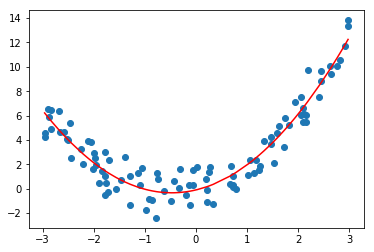

In [19]:
plt.scatter(x,y)
plt.plot(np.sort(x),predict_y[np.argsort(x)],color='r')
plt.show()

In [20]:
lin_reg.coef_

array([0.        , 1.00222675, 1.05851859])

In [21]:
lin_reg.intercept_

-0.10163387115076805

## 关于PolynomialFeatures

In [23]:
X = np.arange(1,11).reshape(-1,2)
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [26]:
poly = PolynomialFeatures()
poly.fit(X)
X2 = poly.transform(X)

In [27]:
X2.shape

(5, 6)

## Pipeline

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [42]:
x = np.random.uniform(-3,3,size=m)
X = x.reshape(-1,1)
y = 3 *x ** 2 + x + 3 + np.random.normal(0.,1.,size=m)

In [44]:
poly_reg = Pipeline(
[
    ('poly',PolynomialFeatures(degree=2)),
    ('ss',StandardScaler()),
    ('lr',LinearRegression())
]
)

In [45]:
poly_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [46]:
predicty = poly_reg.predict(X)

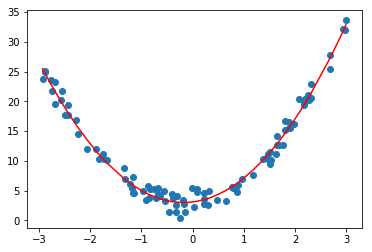

In [48]:
plt.scatter(x,y)
plt.plot(np.sort(x),predicty[np.argsort(x)],color='r')
plt.show()